Importing libraries

NumPy: utilized for high-performance vector arithmetic.

Pandas: utilized for dataset management and cleaning.

Matplotlib: utilized for generating graphical visualizations.

LinearRegressor: a simplt custom built class implementation for the regression logic.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path: sys.path.append(module_path)
from src.linear_regressor import LinearRegressor

For the introduction, I chose a simple dataset suitable for a linear regressor. \
The Salary dataset fits these criteria well and is perfect for demonstrating the basics.

Salary vs Experience: 0.9777


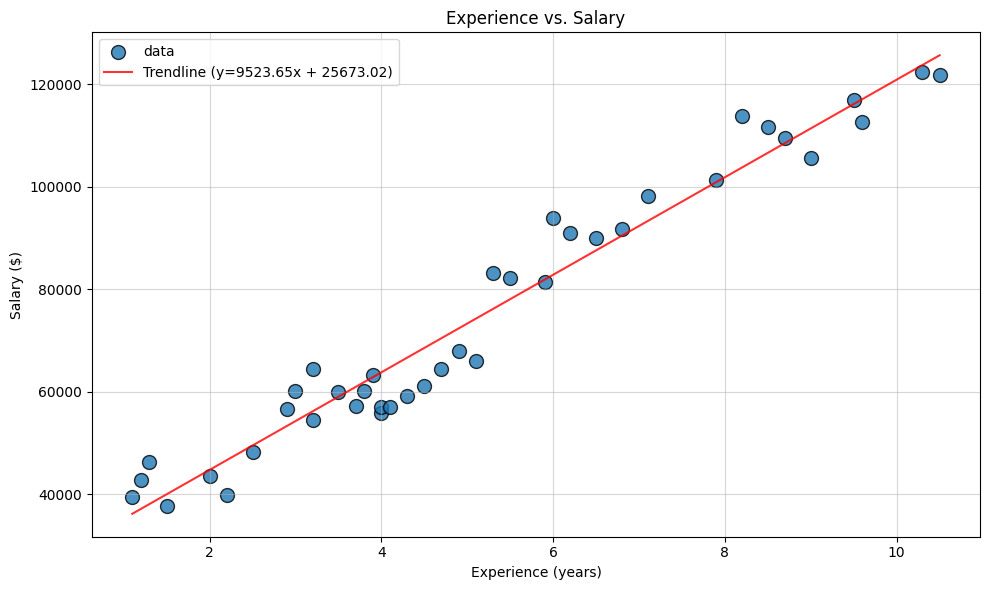

In [5]:
# --- 1. Load Data ---
FILE_PATH = '../datasets/salary_data.csv'

try:
    df = pd.read_csv(FILE_PATH)
except FileNotFoundError:
    print(f"Error: The file at {FILE_PATH} was not found.")
    exit()


# --- 2. Data Cleaning ---
# There is no need to clean the data as it is already clean in this simple dataset.


# --- 3. Analysis ---
# Correlation Matrix (Simple 1-to-1 relationship)
correlation = df['Salary'].corr(df['Experience Years'])
print(f"Salary vs Experience: {correlation:.4f}")


# --- 4. Visualization ---
plt.figure(figsize=(10, 6))

scatter = plt.scatter(
    x=df['Experience Years'],
    y=df['Salary'],
    label="data",
    edgecolors='black', 
    alpha=0.8,
    s=100
)

plt.title("Experience vs. Salary")
plt.xlabel("Experience (years)")
plt.ylabel("Salary ($)")

# trendline
m, b = np.polyfit(df['Experience Years'], df['Salary'], 1)
plt.plot(df['Experience Years'], m*df['Experience Years'] + b, color='red', alpha=0.8, label=f'Trendline (y={m:.2f}x + {b:.2f})')

plt.grid(True, alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# We see an obvious linear relationship between years of experience and salary.

In [ ]:
# --- 1. Select Features & Target ---
# Salary dataset only has one feature: 'Experience Years'

X = df[['Experience Years']].values 

y = df['Salary'].values


# --- 2. Split Data for training & testing ---
np.random.seed(10)  # For reproducibility
shuffled_indices = np.random.permutation(len(X))
split_point = int(len(X) * 0.8)

train_indices = shuffled_indices[:split_point]
test_indices = shuffled_indices[split_point:]

X_train = X[train_indices]
y_train = y[train_indices]

X_test = X[test_indices]
y_test = y[test_indices]


# --- 3. Training ---
print(f"Training on {len(X_train)} samples")

model = LinearRegressor()
model.fit(X_train, y_train)


# --- 4. Evaluation ---
print(f"Testing on {len(X_test)} samples")

print("\n--- Testing Results ---")
predictions = model.predict(X_test)

diff = np.abs(predictions - y_test)
avg_error = np.mean(diff)

print(f"On average, the model's guess is off by: ${avg_error:,.2f}")
print(f"Error percentage: {avg_error / np.mean(y_test) * 100:.2f}%")

Training on 32 samples
Testing on 8 samples

--- Testing Results ---
On average, the model's guess is off by: $3,017.71
Error percentage: 3.76%
